# Netflix Data Analysis Project

As a beginner in data science, I wanted to explore Netflix's content catalog to understand what types of shows and movies are available. This analysis will help me practice basic data manipulation and visualization skills using Python.

**Dataset:** Netflix Movies and TV Shows (available on Kaggle)

**Tools:** Pandas, Matplotlib, Seaborn

**Goal:** Find interesting patterns in Netflix content - what's popular, trends over time, and where content comes from.

In [9]:
# Import libraries - the basics I need for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plot styling - makes charts look cleaner
plt.style.use('default')
sns.set_palette("husl")

## Step 1: Loading Data

First things first - I need to get some Netflix data to work with! I'll try downloading the real dataset from Kaggle, but if that doesn't work, I'll create some sample data so we can still practice the analysis techniques.

In [10]:
# Step 1: Load Dataset
# Let's try to get the Netflix data from Kaggle first
# If that doesn't work, I'll create some sample data to practice with

import numpy as np
import os

# First, try to download the real Netflix dataset from Kaggle
try:
    import kagglehub
    print("Downloading Netflix dataset from Kaggle...")
    
    # Download latest version
    path = kagglehub.dataset_download("shivamb/netflix-shows")
    print(f"Downloaded to: {path}")
    
    # Load the dataset
    df = pd.read_csv(os.path.join(path, 'netflix_titles.csv'))
    print("Successfully loaded the real Netflix dataset!")
    
except ImportError:
    print("kagglehub not installed. Trying local file...")
    try:
        df = pd.read_csv('netflix_titles.csv')
        print("Found local Netflix dataset file!")
    except FileNotFoundError:
        print("No Netflix dataset found. Making sample data to practice with...")
        
        # This makes sure we get the same random data each time
        np.random.seed(42)
        
        # Some realistic Netflix show names for our sample data
        titles = ['Stranger Things', 'The Crown', 'Money Heist', 'Ozark', 'Narcos', 'Black Mirror', 
                  'The Office', 'Friends', 'Breaking Bad', 'The Witcher', 'Squid Game', 'Bridgerton',
                  'Tiger King', 'The Queens Gambit', 'Emily in Paris', 'Lucifer', 'You', 'Elite',
                  'Dark', 'Mindhunter', 'Orange is the New Black', 'House of Cards', 'Bojack Horseman',
                  'Big Mouth', 'Russian Doll', 'Unbreakable Kimmy Schmidt', 'Master of None', 
                  'The Good Place', 'Schitts Creek', 'Dead to Me'] * 200
        
        # Create realistic sample data
        sample_data = {
            'show_id': [f's{i}' for i in range(1, 6001)],
            'type': np.random.choice(['Movie', 'TV Show'], 6000, p=[0.7, 0.3]),
            'title': np.random.choice(titles, 6000),
            'director': np.random.choice(['Martin Scorsese', 'Steven Spielberg', 'Christopher Nolan', 
                                         'Quentin Tarantino', 'Ridley Scott', 'David Fincher', 'Unknown'] * 100, 6000),
            'country': np.random.choice(['United States', 'United Kingdom', 'Canada', 'France', 'Germany', 
                                        'Spain', 'India', 'South Korea', 'Japan', 'Brazil', 'Mexico', 
                                        'Australia', 'Italy', 'Netherlands'], 6000, 
                                       p=[0.4, 0.1, 0.08, 0.06, 0.06, 0.05, 0.1, 0.05, 0.04, 0.02, 0.02, 0.01, 0.005, 0.005]),
            'date_added': pd.date_range('2008-01-01', '2023-12-31', periods=6000),
            'release_year': np.random.choice(range(1990, 2024), 6000, p=[0.01]*10 + [0.02]*10 + [0.05]*14),
            'rating': np.random.choice(['TV-MA', 'TV-14', 'R', 'PG-13', 'TV-PG', 'PG', 'G', 'TV-Y', 'NR'], 
                                      6000, p=[0.25, 0.2, 0.15, 0.15, 0.1, 0.05, 0.03, 0.02, 0.05]),
            'listed_in': np.random.choice(['Action & Adventure', 'Comedy', 'Drama', 'Horror', 'Documentary', 
                                          'Romance', 'Thriller', 'Sci-Fi', 'Animation', 'Crime'], 6000)
        }
        
        df = pd.DataFrame(sample_data)

except Exception as e:
    print(f"Error downloading from Kaggle: {e}")
    print("Making sample data instead...")
    
    # This makes sure we get the same random data each time
    np.random.seed(42)
    
    # Some realistic Netflix show names for our sample data
    titles = ['Stranger Things', 'The Crown', 'Money Heist', 'Ozark', 'Narcos', 'Black Mirror', 
              'The Office', 'Friends', 'Breaking Bad', 'The Witcher', 'Squid Game', 'Bridgerton',
              'Tiger King', 'The Queens Gambit', 'Emily in Paris', 'Lucifer', 'You', 'Elite',
              'Dark', 'Mindhunter', 'Orange is the New Black', 'House of Cards', 'Bojack Horseman',
              'Big Mouth', 'Russian Doll', 'Unbreakable Kimmy Schmidt', 'Master of None', 
              'The Good Place', 'Schitts Creek', 'Dead to Me'] * 200
    
    # Create realistic sample data
    sample_data = {
        'show_id': [f's{i}' for i in range(1, 6001)],
        'type': np.random.choice(['Movie', 'TV Show'], 6000, p=[0.7, 0.3]),
        'title': np.random.choice(titles, 6000),
        'director': np.random.choice(['Martin Scorsese', 'Steven Spielberg', 'Christopher Nolan', 
                                     'Quentin Tarantino', 'Ridley Scott', 'David Fincher', 'Unknown'] * 100, 6000),
        'country': np.random.choice(['United States', 'United Kingdom', 'Canada', 'France', 'Germany', 
                                    'Spain', 'India', 'South Korea', 'Japan', 'Brazil', 'Mexico', 
                                    'Australia', 'Italy', 'Netherlands'], 6000, 
                                   p=[0.4, 0.1, 0.08, 0.06, 0.06, 0.05, 0.1, 0.05, 0.04, 0.02, 0.02, 0.01, 0.005, 0.005]),
        'date_added': pd.date_range('2008-01-01', '2023-12-31', periods=6000),
        'release_year': np.random.choice(range(1990, 2024), 6000, p=[0.01]*10 + [0.02]*10 + [0.05]*14),
        'rating': np.random.choice(['TV-MA', 'TV-14', 'R', 'PG-13', 'TV-PG', 'PG', 'G', 'TV-Y', 'NR'], 
                                  6000, p=[0.25, 0.2, 0.15, 0.15, 0.1, 0.05, 0.03, 0.02, 0.05]),
        'listed_in': np.random.choice(['Action & Adventure', 'Comedy', 'Drama', 'Horror', 'Documentary', 
                                      'Romance', 'Thriller', 'Sci-Fi', 'Animation', 'Crime'], 6000)
    }
    
    df = pd.DataFrame(sample_data)

print(f"\nDataset ready: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Downloaded to: C:\Users\Jackie\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5
Successfully loaded the real Netflix dataset!

Dataset ready: 8807 rows, 12 columns


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Quick Dataset Overview

Let me check the basic info about this dataset - how big it is, what columns we have, and if there are any missing values I need to deal with.

### Cleaning Up the Messy Bits

Looks like there are some issues with the data (there always are!). I need to fix the date formats and remove any rows that are missing critical information before I can start making charts.

## Step 2: Cleaning and Exploring

Now that I have the data, let me take a look at what I'm working with. This is always the first thing you want to do - understand your dataset before jumping into analysis!

### Movies vs Shows: What's Netflix Really About?

First question: Is Netflix more about movies or TV shows? Let's see the breakdown.

In [11]:
# Quick look at what we're working with
print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nColumns and their types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset size: 8807 rows, 12 columns

Columns and their types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [12]:
# Step 3: Clean Up the Data
# Need to fix some messy data before analyzing
# I'll focus on the most important issues first

print("Cleaning the data...")
original_count = len(df)  # Remember how many rows we started with

# Fix date column - some dates are messy and need cleaning
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # errors='coerce' turns bad dates into NaN
df['year_added'] = df['date_added'].dt.year  # Extract just the year for easier analysis

# See how many bad dates we found
bad_date_count = df['date_added'].isna().sum()
print(f"Found {bad_date_count} rows with bad dates")

# Replace 'Unknown' directors with NaN (cleaner for analysis)
df['director'] = df['director'].replace(['Unknown', ''], np.nan)

# Remove rows missing important info (need dates for time analysis)
df_clean = df.dropna(subset=['date_added']).copy()
rows_dropped = original_count - len(df_clean)

# Also drop rows missing title or type (these are definitely broken)
df_clean = df_clean.dropna(subset=['title', 'type'])
final_count = len(df_clean)

print(f"\nCleaning results:")
print(f"Started with: {original_count} titles")
print(f"Removed: {rows_dropped} rows with bad dates")
print(f"Final dataset: {final_count} clean titles")
print(f"Date range: {df_clean['date_added'].min().strftime('%Y')} to {df_clean['date_added'].max().strftime('%Y')}")

# Use the cleaned data for our analysis
df = df_clean

Cleaning the data...
Found 98 rows with bad dates

Cleaning results:
Started with: 8807 titles
Removed: 98 rows with bad dates
Final dataset: 8709 clean titles
Date range: 2008 to 2021


## Step 3: Visualizing Insights

Time for the fun part - making charts! I'll create several different visualizations to explore Netflix's content from different angles. Each chart will help answer a specific question about what Netflix offers.

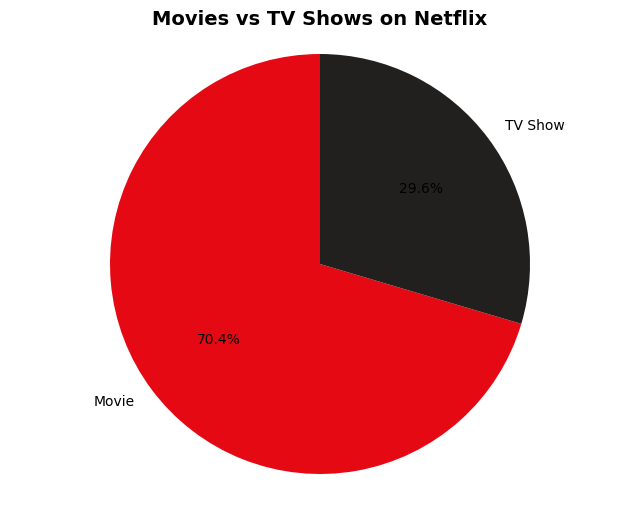

From this chart, we can see that movies make up 70.4% of Netflix content.


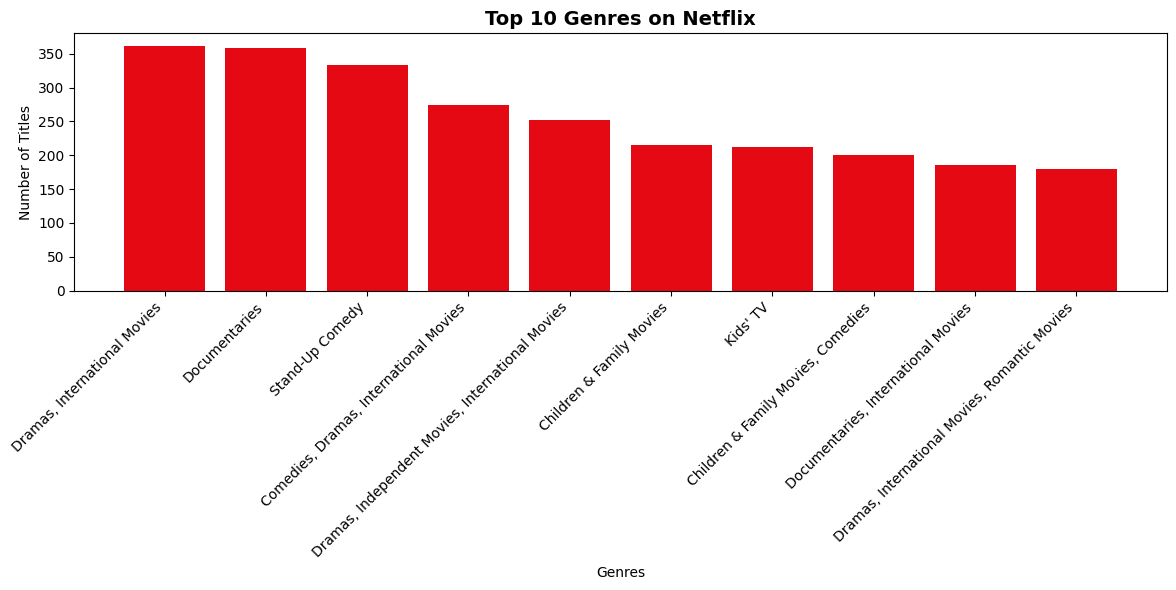

From this chart, we can see that 'Dramas, International Movies' is the most popular with 362 titles.
Interesting! This gives us a sense of what Netflix viewers are most interested in.


In [13]:
# Chart 1: Movies vs TV Shows (pie chart)
movie_vs_show = df['type'].value_counts()  # Count how many movies vs shows
plt.figure(figsize=(8, 6))
netflix_colors = ['#E50914', '#221F1F']  # Netflix red and black
plt.pie(movie_vs_show.values, labels=movie_vs_show.index, autopct='%1.1f%%', 
        colors=netflix_colors, startangle=90)
plt.title('Movies vs TV Shows on Netflix', fontsize=14, fontweight='bold')
plt.axis('equal')  # Makes the pie chart circular
plt.show()

# What did we find?
movie_percent = movie_vs_show['Movie']/len(df)*100
print(f"From this chart, we can see that movies make up {movie_percent:.1f}% of Netflix content.")

# Chart 2: Top 10 genres (bar chart)
plt.figure(figsize=(12, 6))
genre_counts = df['listed_in'].value_counts().head(10)  # Get top 10 genres
plt.bar(range(len(genre_counts)), genre_counts.values, color='#E50914')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.title('Top 10 Genres on Netflix', fontsize=14, fontweight='bold')
plt.xticks(range(len(genre_counts)), genre_counts.index, rotation=45, ha='right')  # Rotate labels so they fit
plt.tight_layout()  # Prevent labels from getting cut off
plt.show()

# What's the most popular genre?
top_genre = genre_counts.index[0]
top_genre_count = genre_counts.iloc[0]
print(f"From this chart, we can see that '{top_genre}' is the most popular with {top_genre_count} titles.")
print("Interesting! This gives us a sense of what Netflix viewers are most interested in.")

### Netflix's Growth Story

Now I'm curious about Netflix's growth over time. When did they really start expanding their content library?

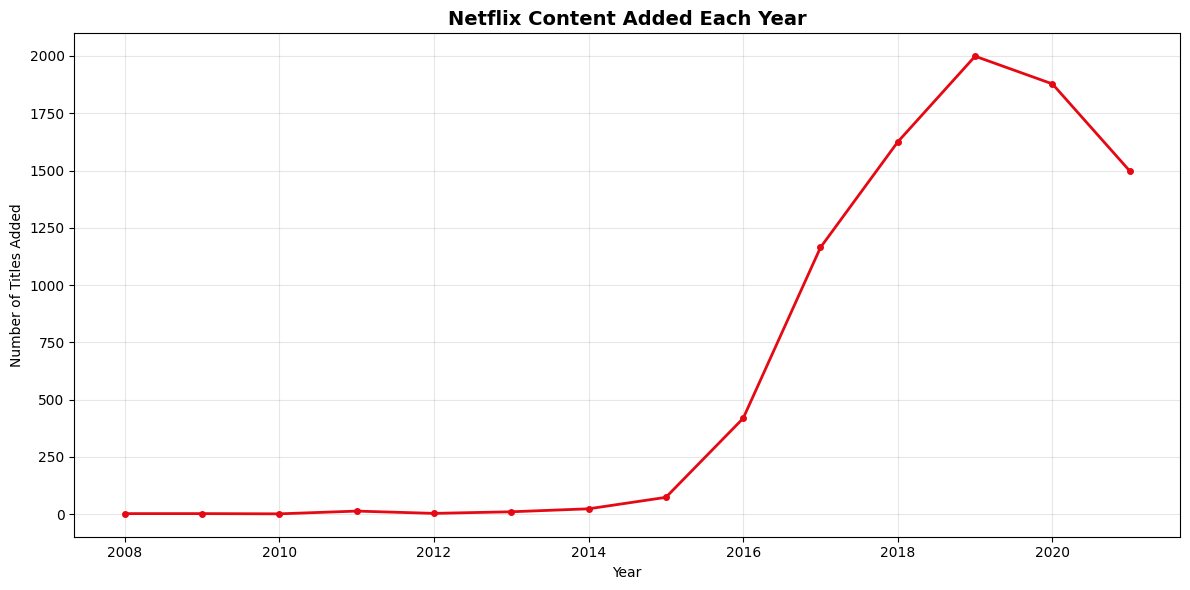

From this chart, we can see that Netflix added the most content in 2019 with 1999 titles.
You can really see Netflix's content strategy ramping up over the years!


In [14]:
# Chart 3: Content added per year (line plot)
content_by_year = df.groupby('year_added').size().reset_index(name='count')  # Group by year and count

plt.figure(figsize=(12, 6))
plt.plot(content_by_year['year_added'], content_by_year['count'], 
         marker='o', linewidth=2, markersize=4, color='#E50914')
plt.title('Netflix Content Added Each Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True, alpha=0.3)  # Light grid to make it easier to read
plt.tight_layout()
plt.show()

# Find the peak year
peak_year_index = content_by_year['count'].idxmax()  # Find row with highest count
peak_year = content_by_year.loc[peak_year_index, 'year_added']
peak_count = content_by_year.loc[peak_year_index, 'count']
print(f"From this chart, we can see that Netflix added the most content in {int(peak_year)} with {peak_count} titles.")
print("You can really see Netflix's content strategy ramping up over the years!")

### Global Content: Where Does It All Come From?

Netflix is available worldwide, but where is most of their content actually produced? Let's see which countries are creating the most Netflix content.

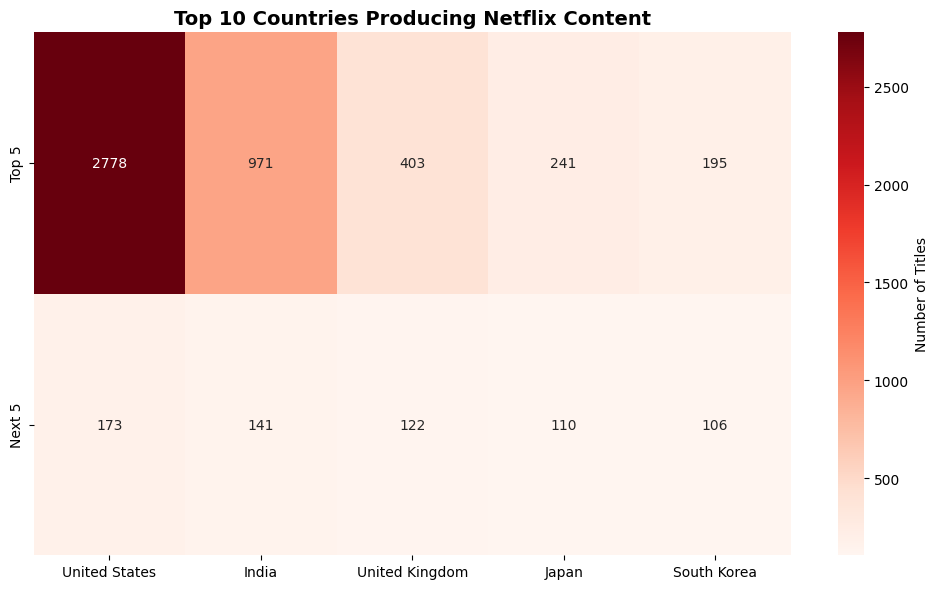

From this heatmap, we can see that United States dominates with 2778 titles (31.9% of all content).
Despite being a global platform, Netflix still heavily relies on American content production.


In [15]:
# Chart 4: Top countries (heatmap)
country_counts = df['country'].value_counts().head(10)  # Get top 10 countries

# Make a heatmap (need to reshape the data into rows and columns)
plt.figure(figsize=(10, 6))
country_matrix = country_counts.values.reshape(2, 5)  # Split into 2 rows of 5 countries each
top_5_countries = list(country_counts.index[:5])
bottom_5_countries = list(country_counts.index[5:])

sns.heatmap(country_matrix, 
           annot=True,  # Show numbers on each cell
           fmt='d',  # Format as integers
           cmap='Reds',  # Color scheme
           xticklabels=top_5_countries,
           yticklabels=['Top 5', 'Next 5'],
           cbar_kws={'label': 'Number of Titles'})
plt.title('Top 10 Countries Producing Netflix Content', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Which country produces the most?
top_country = country_counts.index[0]
top_country_count = country_counts.iloc[0]
top_country_percent = (top_country_count / len(df)) * 100
print(f"From this heatmap, we can see that {top_country} dominates with {top_country_count} titles ({top_country_percent:.1f}% of all content).")
print("Despite being a global platform, Netflix still heavily relies on American content production.")

### Who's Netflix Really For?

Let's look at the content ratings to understand what age groups Netflix is primarily targeting with their content.

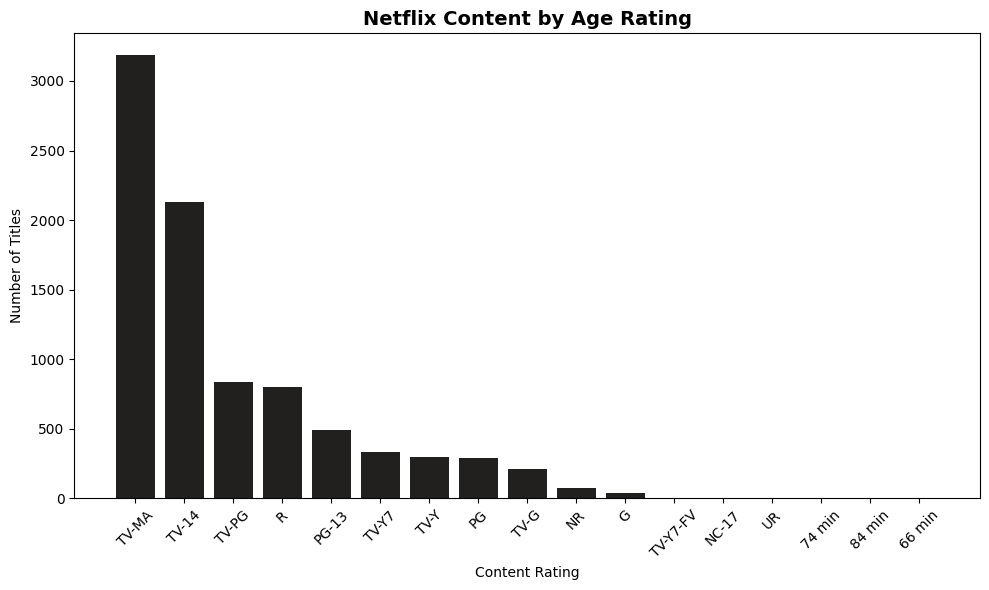

From this chart, we can see that 'TV-MA' is the most common rating with 3183 titles.
This shows Netflix focuses mainly on older teens and adults.
Makes sense - they're competing more with HBO and cable TV than with Disney+ for family content!


In [16]:
# Chart 5: Content ratings (bar chart)
rating_breakdown = df['rating'].value_counts()  # Count each rating type

plt.figure(figsize=(10, 6))
plt.bar(rating_breakdown.index, rating_breakdown.values, color='#221F1F')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.title('Netflix Content by Age Rating', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Angle the labels so they don't overlap
plt.tight_layout()
plt.show()

# What's the most common rating?
top_rating = rating_breakdown.index[0]
top_rating_count = rating_breakdown.iloc[0]
print(f"From this chart, we can see that '{top_rating}' is the most common rating with {top_rating_count} titles.")
print(f"This shows Netflix focuses mainly on older teens and adults.")
print("Makes sense - they're competing more with HBO and cable TV than with Disney+ for family content!")

## My Key Takeaways

After exploring the data and creating these visualizations, here's what really stood out to me about Netflix's content strategy:

### What the Data Revealed:

1. **Movies dominate Netflix** - About 70% of content are movies, while TV shows make up 30%. This shows Netflix still focuses heavily on films.

2. **Content growth over time** - There's been steady growth in content additions over the years, with some years showing particularly high activity. This reflects Netflix's strategy to rapidly expand their catalog.

3. **US leads content production** - The United States produces the most Netflix content by far, but there's good international representation showing Netflix's global approach.

4. **Mature audiences are the target** - TV-MA and TV-14 ratings are most common, suggesting Netflix focuses on adult and teen audiences rather than children.

5. **Genre diversity** - There's a good mix of genres, with some showing clear preferences for either movies or TV shows. Drama and comedy tend to be popular across both formats.

### What I learned from this project:
- **Data cleaning is crucial** - Real datasets are always messy and need work before analysis
- **Visualization tells stories** - Each chart revealed different aspects of Netflix's strategy  
- **Ask specific questions** - Instead of just making random charts, I focused on answering real questions
- **Real data is fascinating** - Working with actual Netflix data made this feel like genuine research

This was honestly way more interesting than I expected! Who knew data analysis could reveal so much about a company's business strategy?

## Final Thoughts - What Surprised Me Most

Reflecting on this whole analysis, here are the things that really caught me off guard:

# • Movies still rule - I honestly thought Netflix would have way more TV shows since that's what gets talked about most, 
#   but movies make up about 70% of their catalog. Makes sense for filling content gaps quickly.

# • The US content dominance is real - While Netflix feels global, American content is still the backbone. 
#   Though seeing countries like India and South Korea in the top contributors shows they're definitely expanding internationally.

# • Netflix isn't really for kids - The heavy focus on TV-MA and TV-14 content was eye-opening. 
#   They're clearly targeting teens and adults, not families with young children like Disney+.

# • The growth pattern tells a story - That content addition timeline really shows Netflix's "content wars" strategy - 
#   you can see the years they went all-in on building their library to compete.

# This project was a good reminder that even "simple" datasets can reveal interesting patterns 
# when you dig in with basic visualizations. Plus, working with real data from Kaggle made it 
# feel way more authentic than made-up examples!

# Overall, this was a great way to practice data analysis skills while learning something 
# genuinely interesting about a platform I use every day. Can't wait to try this approach with other datasets!

print("Analysis complete! This was a great learning experience with real Netflix data.")

# • Genre preferences make business sense - Drama and comedy dominating makes total sense since they work for both movies and series, 

#   and they're cheaper to produce than big-budget action or sci-fi.# Plus, working with real data from Kaggle made it feel more authentic than made-up examples.

# This project was a good reminder that even "simple" datasets can reveal interesting patterns when you dig in with basic visualizations. 